In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon
import geojson


EDA : Análisis Exploratorio de Datos

In [4]:
eda= pd.read_csv("../Data/Siniestro_viales_limpio.csv")

Observación de los datos ingestados

In [5]:
eda

,Id,Fecha,Año,Mes,Día,Día_Semana,Hora_completa,Hora,Numero_víctimas,Participantes,...,Calle,Cruce,Dirección_normalizada,Comuna,Barrios,Coordenada_x,Coordenada_y,Pos_x,Pos_y,Semestre
0,2016-0001,2016-01-01,2016.0,1,1,Viernes,04:00:00,4.0,1,MOTO-AUTO,...,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI,98896.782384,93532.434378,-58.475340,-34.687570,2016-1
1,2016-0002,2016-01-02,2016.0,1,2,Sabado,01:15:00,1.0,1,AUTO-PASAJEROS,...,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,LINIERS - MATADEROS - PARQUE AVELLANEDA,95832.055711,95505.416420,-58.508775,-34.669777,2016-1
2,2016-0003,2016-01-03,2016.0,1,3,Domingo,07:00:00,7.0,1,MOTO-AUTO,...,ENTRE RIOS AV.,NaN,ENTRE RIOS AV. 2034,1,CONSTITUCION - MONTSERRAT - PUERTO MADERO - RE...,106684.290900,99706.576878,-58.390403,-34.631894,2016-1
3,2016-0004,2016-01-10,2016.0,1,10,Domingo,00:00:00,0.0,1,MOTO-SD,...,LARRAZABAL AV.,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI,99840.652248,94269.165344,-58.465039,-34.680930,2016-1
4,2016-0005,2016-01-21,2016.0,1,21,Jueves,05:20:00,5.0,1,MOTO-PASAJEROS,...,SAN JUAN AV.,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,CONSTITUCION - MONTSERRAT - PUERTO MADERO - RE...,106980.328279,100752.169158,-58.387183,-34.622466,2016-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021.0,12,12,Domingo,06:20:00,6.0,1,PEATON-AUTO,...,RIVADAVIA AV.,PUEYRREDON AV.,RIVADAVIA AV. y PUEYRREDON AV.,3,BALVANERA - SAN CRISTOBAL,105258.353686,102122.932314,-58.405969,-34.610120,2021-2
713,2021-0093,2021-12-13,2021.0,12,13,Lunes,17:10:00,17.0,1,MOTO-AUTO,...,RIESTRA AV.,MOM,RIESTRA AV. y MOM,7,FLORES - PARQUE CHACABUCO,102728.600901,98186.249292,-58.433538,-34.645616,2021-2
714,2021-0094,2021-12-20,2021.0,12,20,Lunes,01:10:00,1.0,1,MOTO-AUTO,...,"DELLEPIANE, LUIS, TTE. GRAL.",LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,LINIERS - MATADEROS - PARQUE AVELLANEDA,99624.297958,97569.698011,-58.467398,-34.651178,2021-2
715,2021-0095,2021-12-30,2021.0,12,30,Jueves,00:43:00,0.0,1,MOTO-CARGAS,...,GAONA AV.,TERRADA,GAONA AV. y TERRADA,11,VILLA DEL PARQUE - VILLA DEVOTO - VILLA GRAL....,99116.454924,101045.232848,-58.472934,-34.619847,2021-2


In [6]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     717 non-null    object 
 1   Fecha                  702 non-null    object 
 2   Año                    702 non-null    float64
 3   Mes                    717 non-null    int64  
 4   Día                    717 non-null    int64  
 5   Día_Semana             702 non-null    object 
 6   Hora_completa          702 non-null    object 
 7   Hora                   701 non-null    float64
 8   Numero_víctimas        717 non-null    int64  
 9   Participantes          702 non-null    object 
 10  Rol                    717 non-null    object 
 11  Acusado                702 non-null    object 
 12  Victima                702 non-null    object 
 13  Sexo                   717 non-null    object 
 14  Edad                   664 non-null    float64
 15  Rango_

Se modifican los tipo de datos de las columnas 'Edad' y 'Hora' que se encontraban en tipo Float a Entero

In [7]:
eda["Edad"] = eda["Edad"].fillna(0.0)
eda["Edad"] = eda["Edad"].astype ("Int64")

eda["Hora"] = eda["Hora"].fillna(0.0)
eda["Hora"] = eda["Hora"].astype ("Int64")

eda["Año"] = eda["Año"].fillna(0.0)
eda["Año"] = eda["Año"].astype ("Int64")



In [8]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     717 non-null    object 
 1   Fecha                  702 non-null    object 
 2   Año                    717 non-null    Int64  
 3   Mes                    717 non-null    int64  
 4   Día                    717 non-null    int64  
 5   Día_Semana             702 non-null    object 
 6   Hora_completa          702 non-null    object 
 7   Hora                   717 non-null    Int64  
 8   Numero_víctimas        717 non-null    int64  
 9   Participantes          702 non-null    object 
 10  Rol                    717 non-null    object 
 11  Acusado                702 non-null    object 
 12  Victima                702 non-null    object 
 13  Sexo                   717 non-null    object 
 14  Edad                   717 non-null    Int64  
 15  Rango_

Búsqueda de Outliers: se analizan los valores atípicos en el Df para considerar si se eliminan o no

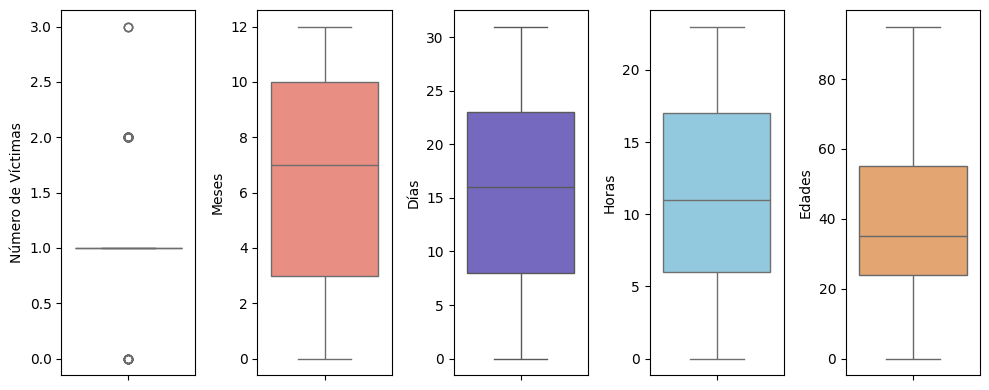

In [9]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 4))

# Crear subplots para los gráficos 
plt.subplot(1, 5, 1) 
sns.boxplot(data=eda, y='Numero_víctimas', color = "#FA8072")
plt.ylabel('Número de Víctimas')

plt.subplot(1, 5, 2) 
sns.boxplot(data=eda, y='Mes', color = "#FA8072")
plt.ylabel('Meses')

plt.subplot(1, 5, 3) 
sns.boxplot(data=eda, y='Día', color = "#6A5ACD")
plt.ylabel('Días')

plt.subplot(1, 5, 4) 
sns.boxplot(data=eda, y='Hora', color = "#87CEEB")
plt.ylabel('Horas')

plt.subplot(1, 5, 5) 
sns.boxplot(data=eda, y='Edad', color = "#F6A460")
plt.ylabel('Edades')

# Ajustar espaciado entre subplots
plt.tight_layout()

plt.show()

Se puede observar que los Outliers encontrados en la columna de 'Numero_víctimas' son los valores 2 y 3, debido a que la mayoría de los casos el registro es el valor 1 con respecto a las victimas en los siniestros.

Análisis sobre la cantidad de víctimas en siniestros viales por mes 

C:\Users\belen\AppData\Local\Temp\ipykernel_12088\1822429787.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Mes', y='Numero_víctimas', data=data, palette="winter")


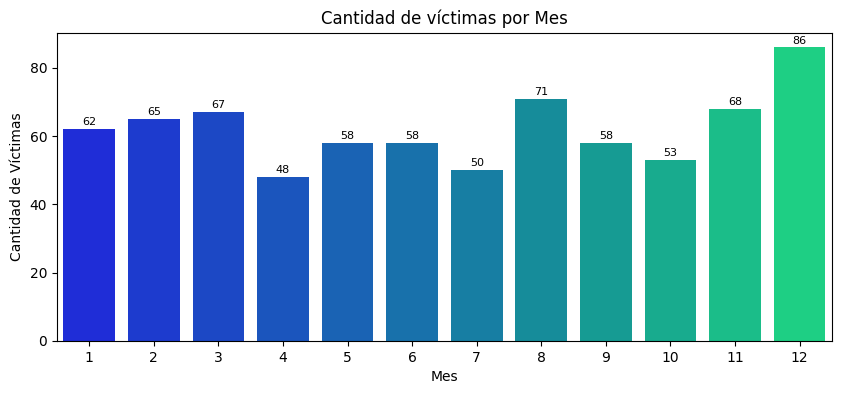

In [10]:
# Se agrupa por la cantidad de víctimas por mes
data = eda.groupby(['Mes'])['Numero_víctimas'].sum().reset_index()
data = data.drop(data.index[0])

# Se grafica
plt.figure(figsize=(10,4))

ax = sns.barplot(x='Mes', y='Numero_víctimas', data=data, palette="winter")
ax.set_title('Cantidad de víctimas por Mes')
ax.set_xlabel('Mes') ; ax.set_ylabel('Cantidad de Víctimas')

# Agregar etiquetas de número de víctimas en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Se muestra el gráfico
plt.show()

Se puede observar que el mes con mayor cantidad de victimas en siniestros viales es Diciembre 

Análisis sobre la cantidad de víctimas en siniestros viales por Día

C:\Users\belen\AppData\Local\Temp\ipykernel_12088\4062488157.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Día', y='Numero_víctimas', data=data1, palette="spring")


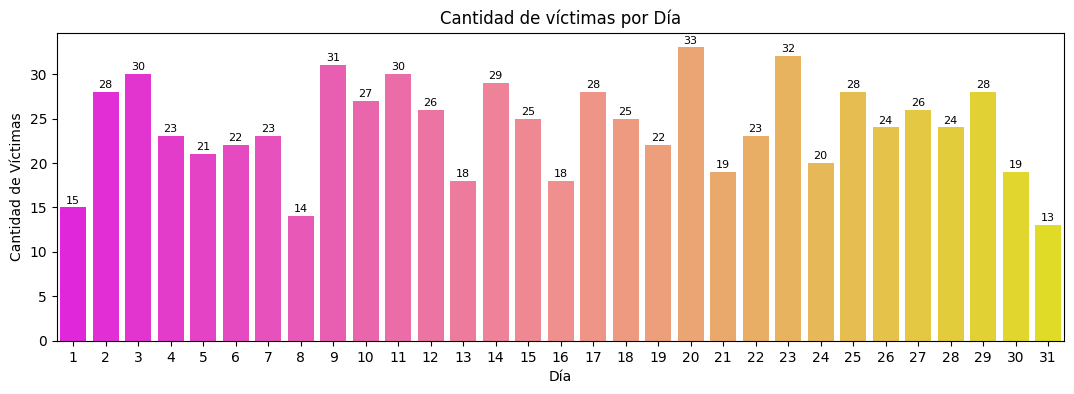

In [11]:
data1 = eda.groupby(['Día'])['Numero_víctimas'].sum().reset_index()
data1 = data1.drop(data1.index[0])

# Se grafica
plt.figure(figsize=(13,4))

ax = sns.barplot(x='Día', y='Numero_víctimas', data=data1, palette="spring")
ax.set_title('Cantidad de víctimas por Día')
ax.set_xlabel('Día') ; ax.set_ylabel('Cantidad de Víctimas')

# Agregar etiquetas de número de víctimas en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Se muestra el gráfico
plt.show()

Análisis sobre la cantidad de víctimas en siniestros viales por Día de Semana

C:\Users\belen\AppData\Local\Temp\ipykernel_12088\2222379298.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Día_Semana', y='Numero_víctimas', data=data2, palette="autumn")


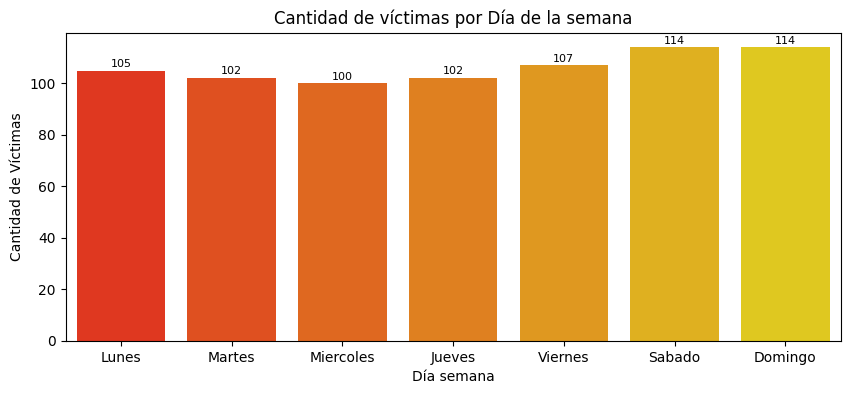

In [12]:
#Se agrupa la cantidad de víctimas por dia de semana
data2 = eda.groupby(['Día_Semana'])['Numero_víctimas'].sum().reset_index()


#Luego se ordenan los días de la semana
Orden_dias_semana = ["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"]

#Se crea una columna 'Orden_dia_semana' en el Df para representar el orden numérico de los días de la semana
data2['Orden_dia_semana'] = data2['Día_Semana'].apply(lambda x: Orden_dias_semana.index(x))

#Por último, se ordena el Df según el orden numérico de los días de la semana
data2 = data2.sort_values(by='Orden_dia_semana')



# Se grafica
plt.figure(figsize=(10,4))

ax = sns.barplot(x='Día_Semana', y='Numero_víctimas', data=data2, palette="autumn")
ax.set_title('Cantidad de víctimas por Día de la semana')
ax.set_xlabel('Día semana') ; ax.set_ylabel('Cantidad de Víctimas')

# Agregar etiquetas de número de víctimas en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Se muestra el gráfico
plt.show()

Se puede observar que los días Sábado y Domingos son los que registran mayor cantidad de víctimas en siniestros viales. Esto se puede relacionar con la ajetreada actividad nocturna que se intensifica especialmente durante los fines de semana.

Análisis sobre la cantidad de víctimas en siniestros viales por Año

C:\Users\belen\AppData\Local\Temp\ipykernel_12088\2898070323.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Año', y='Numero_víctimas', data=data3, palette="summer")


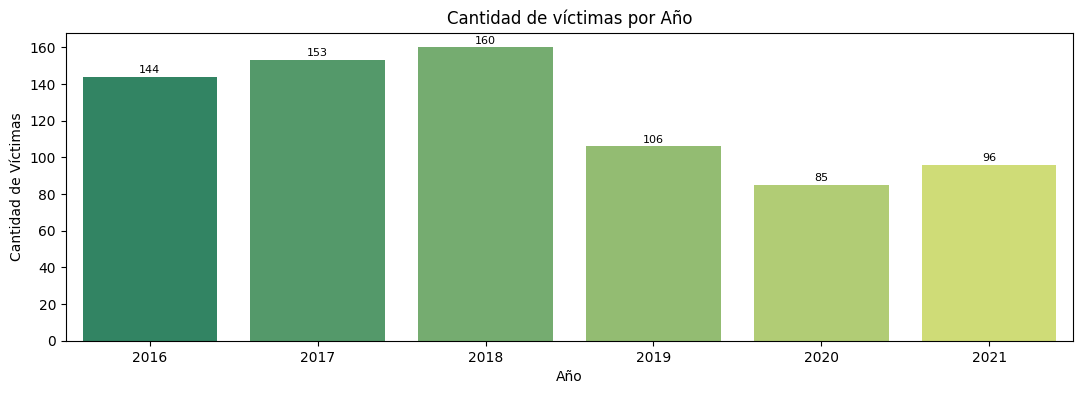

In [13]:
data3 = eda.groupby(['Año'])['Numero_víctimas'].sum().reset_index()
data3 = data3.drop(data3.index[0])

# Se grafica
plt.figure(figsize=(13,4))

ax = sns.barplot(x='Año', y='Numero_víctimas', data=data3, palette="summer")
ax.set_title('Cantidad de víctimas por Año')
ax.set_xlabel('Año') ; ax.set_ylabel('Cantidad de Víctimas')

# Agregar etiquetas de número de víctimas en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Se muestra el gráfico
plt.show()

Se puede observar que hubo un pico de victimas de siniestros viales en el año 2018. Asimismo, se puede observar también que en el año 2020 disminuyó considerablemente. Esto se puede relacionar con la declaración de la pandemia mundial y las restricciones de viaje y movilidad impuestas

Análisis de edad de las víctimas de siniestros viales por año

C:\Users\belen\AppData\Local\Temp\ipykernel_12088\3770937767.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Año', y='Edad', data=data4, palette="winter")


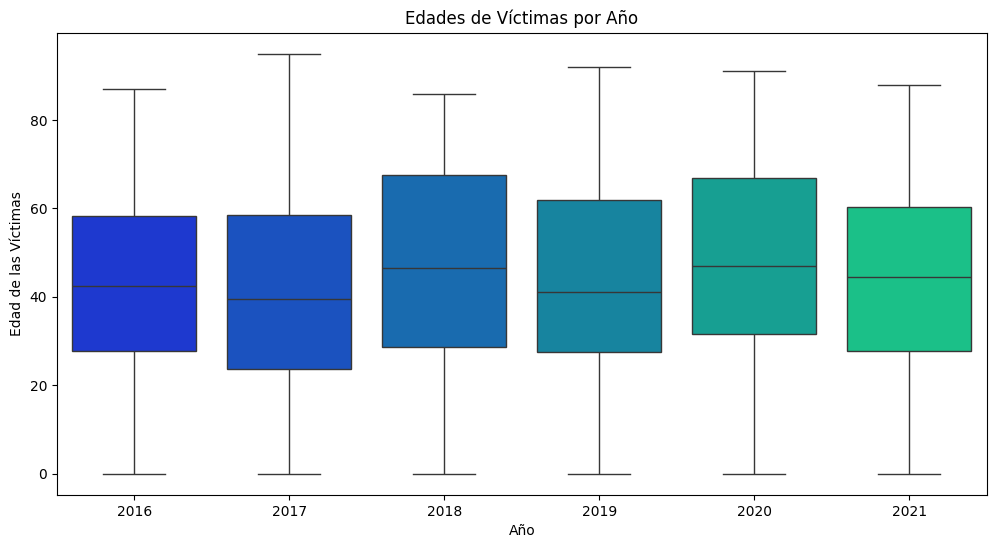

In [14]:
#Se agrupa la cantidad de victimas por edad y año
data4 = eda.groupby(['Edad', 'Año'])['Numero_víctimas'].sum().reset_index()
data4 = data4.drop(data4.index[0])
data4 = data4.loc[~((data4['Año'] == 0) & (data4['Numero_víctimas'] == 0))]
#Se crea el gráfico de boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Año', y='Edad', data=data4, palette="winter")

plt.title('Edades de Víctimas por Año') ; plt.xlabel('Año') ; plt.ylabel('Edad de las Víctimas')
# Cambia el formato de las etiquetas del eje x a enteros
#plt.xticks(rotation=45)
# Se muestra el gráfico
plt.show()

Se puede observar que desde el año 2016 hasta el año 2021, la mediana de la edad de las víctimas de siniestros viales se mantiene entre los 40 y los 45 años.



Análisis de los participantes en los Siniestros viales

C:\Users\belen\AppData\Local\Temp\ipykernel_12088\686409650.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(eda, x="Participantes", palette="winter")


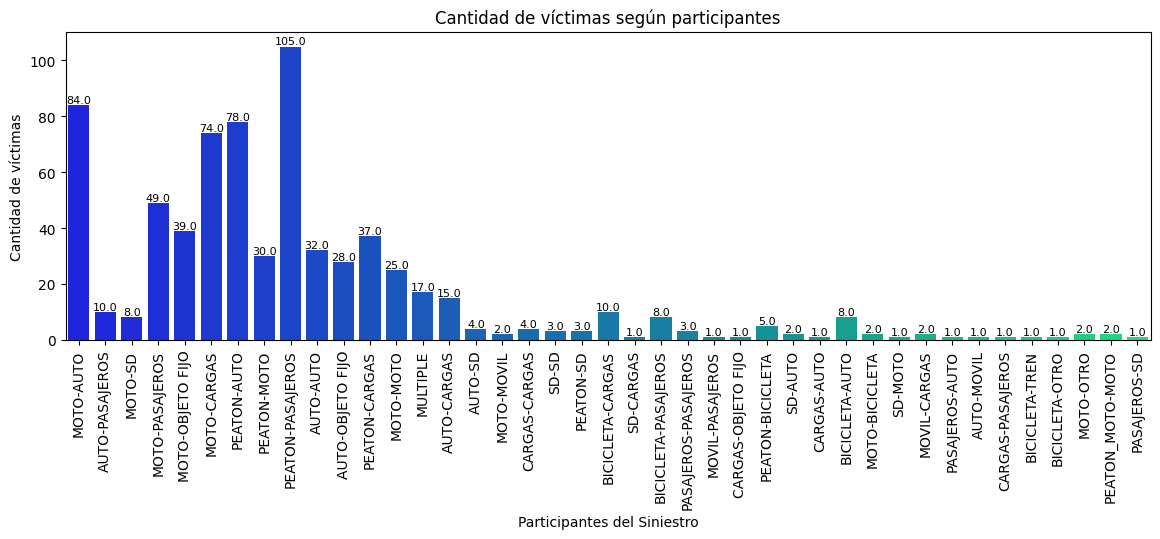

In [15]:
#Se crea el gráfico de barras
plt.figure(figsize=(14, 4))

ax=sns.countplot(eda, x="Participantes", palette="winter")

# Agrega el número de víctimas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)

#Se ubican los titulos de las barras en 90 grados
plt.xticks(rotation=90)

#Se titulan los ejes
plt.xlabel('Participantes del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de víctimas según participantes')

plt.show()

Se puede observar que en la mayoría de la cantidad de víctimas en siniestros viales, las motos son los participantes principales.

Análisis de los acusados en los Siniestros viales

C:\Users\belen\AppData\Local\Temp\ipykernel_12088\48026211.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(eda, x="Acusado", palette="spring")


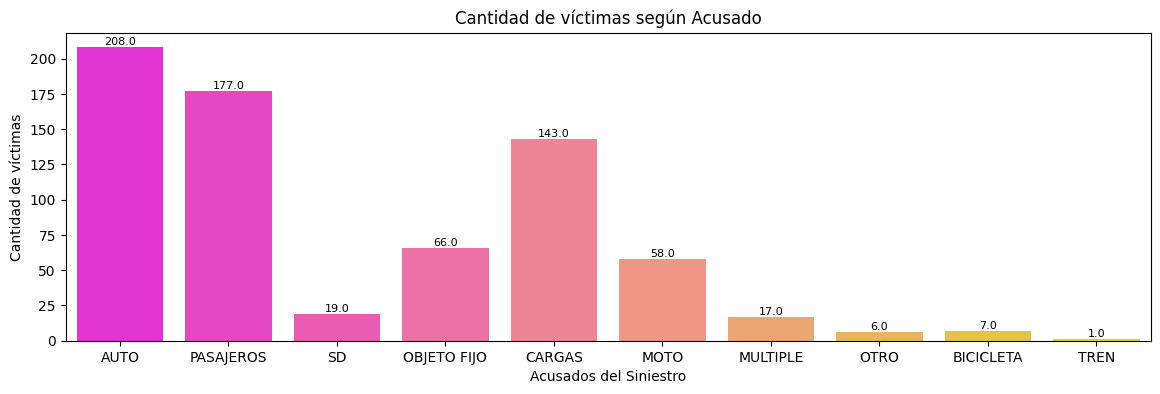

In [16]:
#Se crea el gráfico de barras
plt.figure(figsize=(14, 4))

ax=sns.countplot(eda, x="Acusado", palette="spring")

# Agrega el número de víctimas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)


#Se titulan los ejes
plt.xlabel('Acusados del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de víctimas según Acusado')

plt.show()

Se puede observar que los autos junto con los pasajeron son los mayores acusados en relación a la cantidad de víctimas en siniestro viales. Según el diccionario de datos, pasajero es cualquier persona que se encuentra dentro, descendiendo o ascendiendo del transporte público u omnibús de larga distancia.

Análisis de las víctimas en los Siniestros viales

C:\Users\belen\AppData\Local\Temp\ipykernel_12088\4217103357.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(eda, x="Victima", palette="summer")


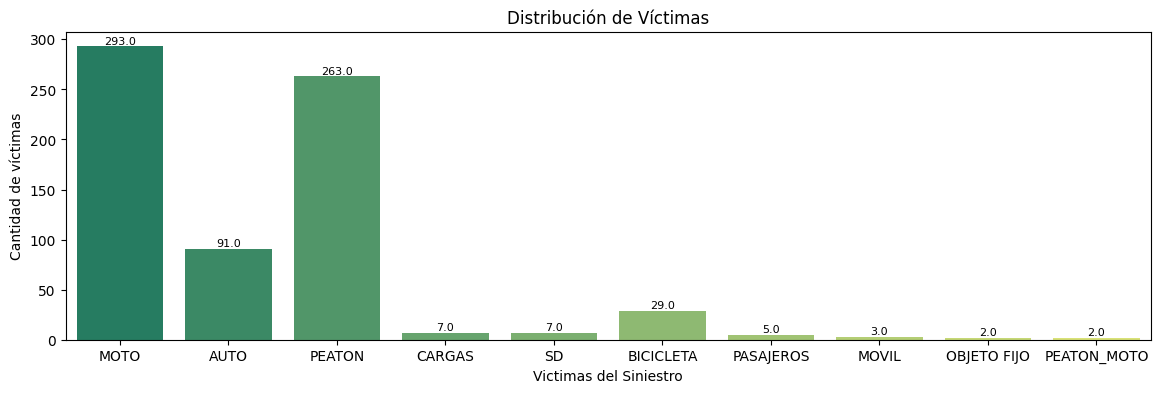

In [17]:
#Se crea el gráfico de barras
plt.figure(figsize=(14, 4))

ax=sns.countplot(eda, x="Victima", palette="summer")

# Agrega el número de víctimas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)


#Se titulan los ejes
plt.xlabel('Victimas del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Distribución de Víctimas')

plt.show()

Se puede observar en el gráfico que las motos, seguidas de los peatones, representan en su mayoría a las víctimas de los siniestros viales ocurridos 

Análisis de víctimas por sexo

Text(0.5, 1.0, 'Proporción de Víctimas por Sexo')

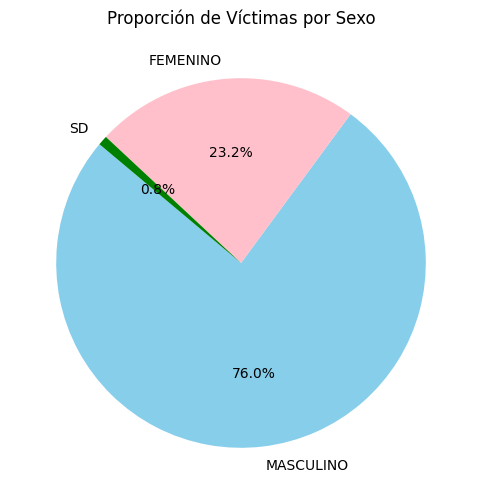

In [18]:
# Se calcula la cantidad de víctimas por sexo
cantidad = eda['Sexo'].value_counts(normalize=True) * 100

# Preparar los datos para el gráfico de torta
labels = cantidad.index
sizes = cantidad.values

# Crear el gráfico de torta
plt.figure(figsize=(12, 6))

# Gráfico de torta

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'pink', 'green'])
plt.title('Proporción de Víctimas por Sexo')

Se puede observar que el 76% de las víctimas de siniestros viales pertenecen al sexo masculino

Análisis de edad de víctimas de siniestros viales por sexo

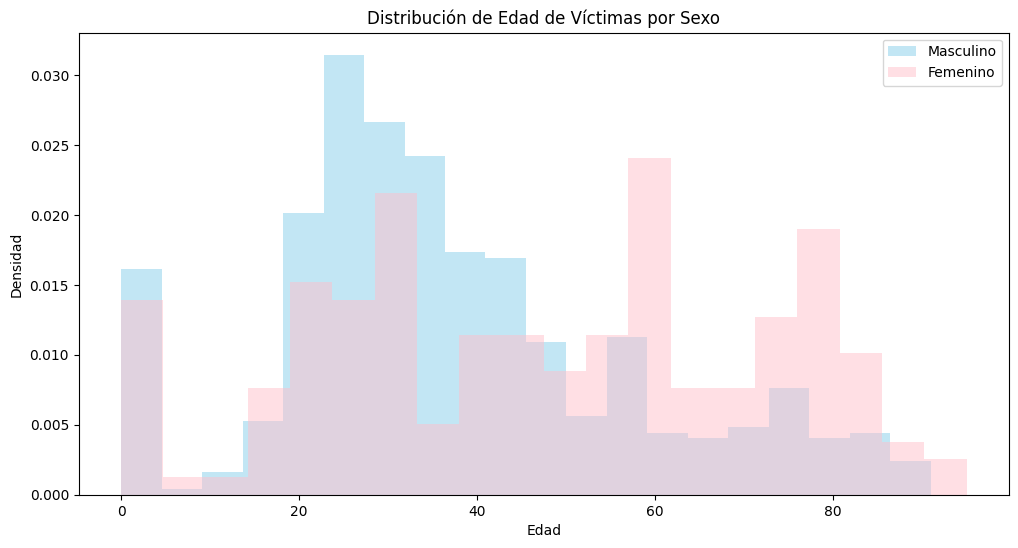

In [19]:
# Primero filtramos la edad de las víctimas por sexo masculino
Masculino = eda[eda['Sexo'] == 'MASCULINO']['Edad'].dropna()

# Luego las filtramos por sexo femenino
Femenino = eda[eda['Sexo'] == 'FEMENINO']['Edad'].dropna()

# se crea el histograma
plt.figure(figsize=(12, 6))
plt.hist(Masculino, bins=20, alpha=0.5, color='skyblue', label='Masculino', density=True)
plt.hist(Femenino, bins=20, alpha=0.5, color='pink', label='Femenino', density=True)
plt.title('Distribución de Edad de Víctimas por Sexo')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend()
plt.show()

Se muestran dos histogramas sobre el mismo eje a fin de poder observar las diferencias entre las víctimas de ambos sexos.
Podemos apreciar que las victimas de siniestros viales del sexo Masculino tienen entre 20 a 40 años de edad, mientras que las víctimas de siniestros viales del sexo Femenino tienen entre 30, 60 y 80 años de edad.

Análisis de los roles de las víctimas de siniestros viales por sexo

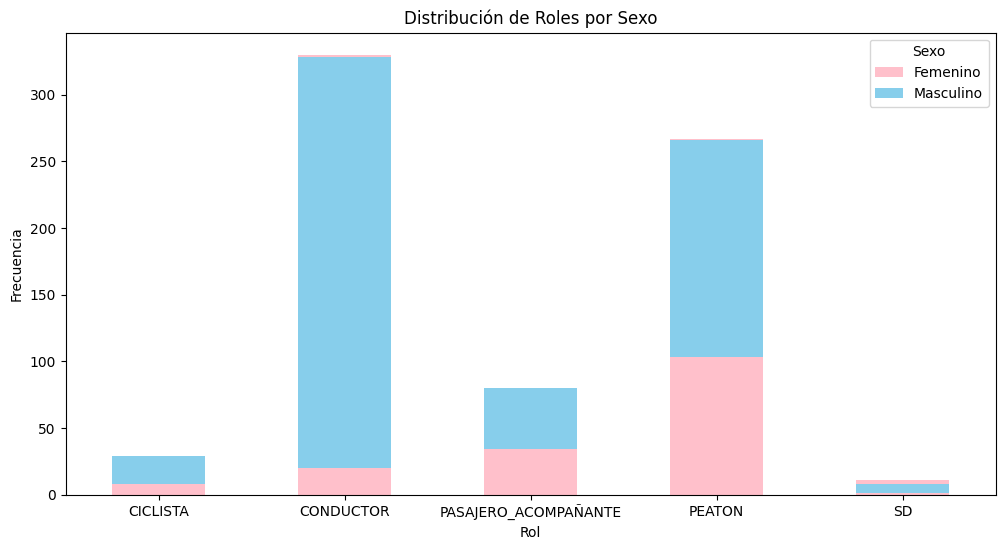

In [20]:
 #Se crea una tabla de contingencia
tabla_contingencia = pd.crosstab(eda['Rol'], eda['Sexo'])

# Luego se crea un gráfico de barras apiladas
ax = tabla_contingencia.plot(kind='bar', stacked=True, figsize=(12, 6), color=["pink",'skyblue'])
plt.title('Distribución de Roles por Sexo')
plt.xlabel('Rol')
plt.ylabel('Frecuencia')

# Agregar una leyenda
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Femenino', 'Masculino'], title='Sexo')

plt.xticks(rotation=0)
plt.show()

En el gráfico se puede observar que en los siniestros viales las victimas tienen como mayor rol Conductor, seguida por Peatón. El sexo masculino es el más frecuente para ambos roles. A su vez, el sexo femenino posee más frecuencia en el rol como peatón y como pasajero-acompañante.

Análisis de víctimas de siniestros viales por sexo y tipo de transporte

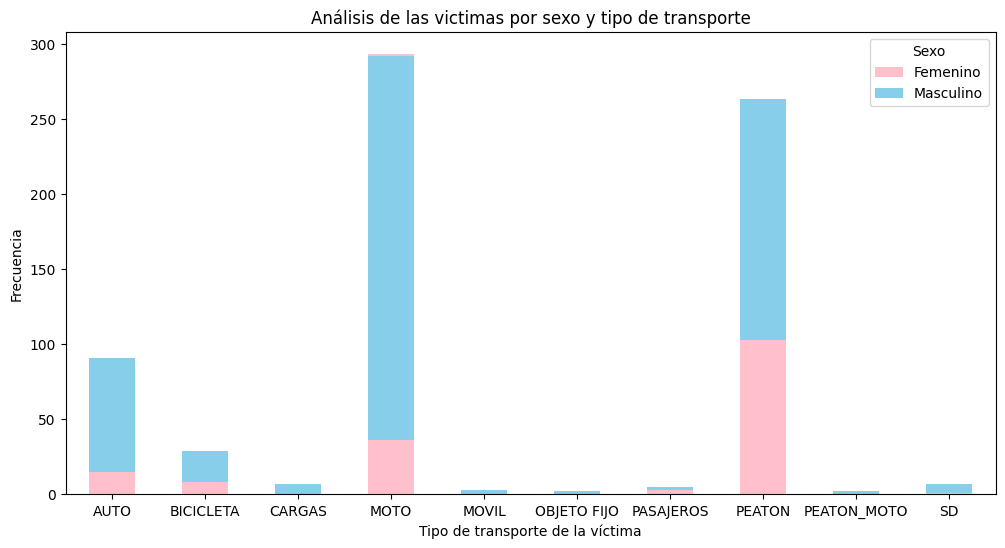

In [21]:
# Se crea una tabla de contingencia
tabla_contingencia = pd.crosstab(eda['Victima'], eda['Sexo'])

# Luego se crea un gráfico de barras apiladas
ax = tabla_contingencia.plot(kind='bar', stacked=True, figsize=(12, 6), color=["pink",'skyblue'])
plt.title('Análisis de las victimas por sexo y tipo de transporte')
plt.xlabel('Tipo de transporte de la víctima')
plt.ylabel('Frecuencia')

# Agregar una leyenda
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Femenino', 'Masculino'], title='Sexo')

plt.xticks(rotation=0)
plt.show()

Se puede apreciar en el gráfico que la mayor cantidad de víctimas en siniestros viales utilizan como transporte la moto, adicionando que pertenecen al sexo masculino. Por otro lado, los peatones, son el segundo tipo de víctima, en el que la mayor cantidad también son del sexo masculino pero con un aumento de cantidad del sexo femenino.

Análisis de la cantidad de víctimas en siniestros viales

C:\Users\belen\AppData\Local\Temp\ipykernel_12088\1633732057.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data5, x='Numero_víctimas', palette="autumn")


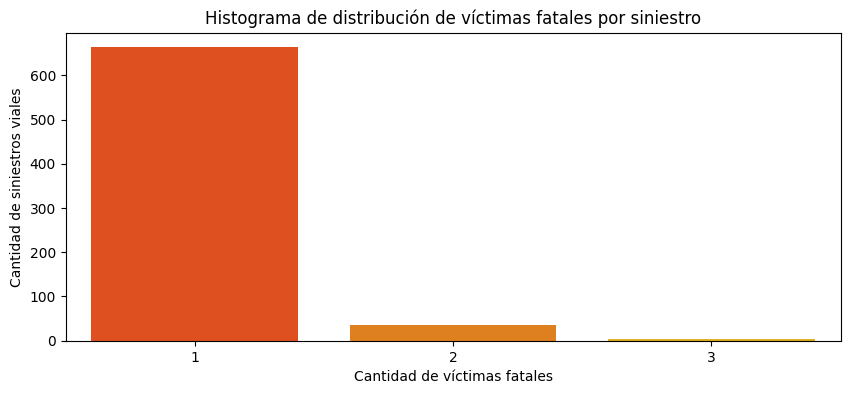

In [22]:
plt.figure(figsize=(10, 4))

data5 = eda[eda["Numero_víctimas"] != 0]

#Se cuentan los datos de la columna y se calcula la frecuencia en que se distribuye
sns.countplot(data5, x='Numero_víctimas', palette="autumn")

plt.ylabel("Cantidad de siniestros viales")
plt.xlabel("Cantidad de víctimas fatales")
plt.title("Histograma de distribución de víctimas fatales por siniestro")

plt.show()

Se puede observar que en la mayoría de los siniestros viales, la cantidad de víctimas es de 1 (una), siendo 2 y 3 las cantidades de victimas con porcentajes relativamente bajos

Análisis de víctimas de siniestros viales por día de semana y hora

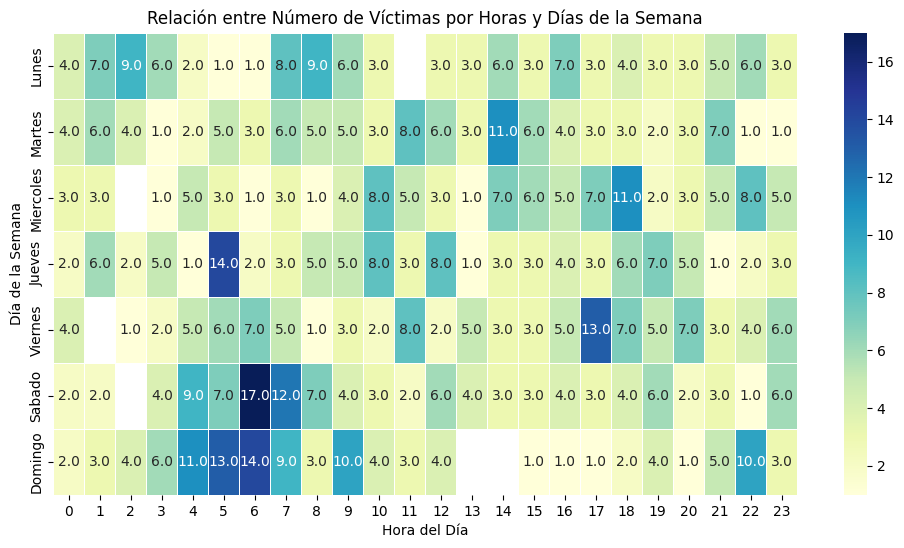

In [34]:
#Se agrupa los datos en cantidad de victimas por dia de la semana y horas
data6 = eda.groupby(['Día_Semana', "Hora"])['Numero_víctimas'].sum().reset_index()
#data6["Hora"]=data6["Hora"].astype("Int64")

# Luego se define el orden de los días de la semana
orden_dias_semana = ["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"]

# Se crea una columna llamada 'Orden_dia_semana' en el Df para representar el orden numérico de los días de la semana
data6['Orden_dia_semana'] = data6['Día_Semana'].apply(lambda x: orden_dias_semana.index(x))

# Se ordena el Df según el orden numérico de los días de la semana
data6 = data6.sort_values(by='Orden_dia_semana')

# Se crea una tabla pivot para los datos
pivot_data6 = data6.pivot_table(index= 'Día_Semana', columns='Hora', values='Numero_víctimas', aggfunc='sum')
pivot_data6 = pivot_data6.reindex(orden_dias_semana)

# Se crea un mapa de calor (heatmap)
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data6, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=0.5)

# Se colocan las etiquetas y el título 

plt.xlabel('Hora del Día')
plt.ylabel('Día de la Semana')
plt.title('Relación entre Número de Víctimas por Horas y Días de la Semana')

plt.show()


Se puede observar en el gráfico que la mayor cantidad de víctimas en siniestros viales ocurren los días Sábados y Domingo en un rango horario entre las 03:00 am y las 09:00 am. 
Tambien se puede visualizar que en el resto de los días semana la mayor cantidad de siniestros viales ocurre entre las 07:00 am y las 09:00 am y en entre las 16:00 pm y 20:00 pm, horarios que coindicen con las entradas y salidas del trabajo.

Distribución espacial de los las victimas de los siniestros viales con Coordenadas usando Geopandas (se define un sistema de referencia de coordenadas (CRS) y éste le dice a Python como se relacionan estas coordenadas que instanciamos con los diferentes lugares del planeta)

c:\Users\belen\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

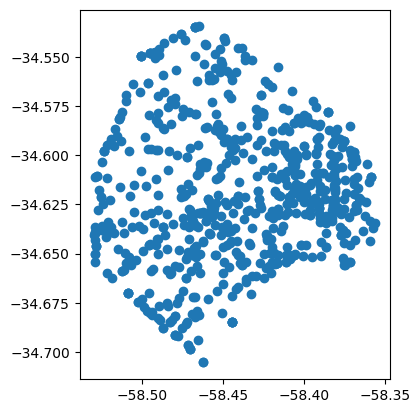

In [23]:
# Iniciamos CRS

crs={'init':'epsg:4326'}
#Definimos la geometría según nuestro dataset
geometry=[Point(xy) for xy in zip(eda["Pos_x"], eda["Pos_y"])]
#Ua vez que tenemos el sistema de referencia decoordenadas y la geometría; se procede a la carga de los datos
geodata=gpd.GeoDataFrame(eda,crs=crs, geometry=geometry)

#Se imprime el resultante que luego será introducido en un mapa
geodata.plot()

In [24]:
#Se extraer el archivo
shapefile = gpd.read_file("../Data/comunas_wgs84.shp")

Text(158.98305973900304, 0.5, 'Latitud')

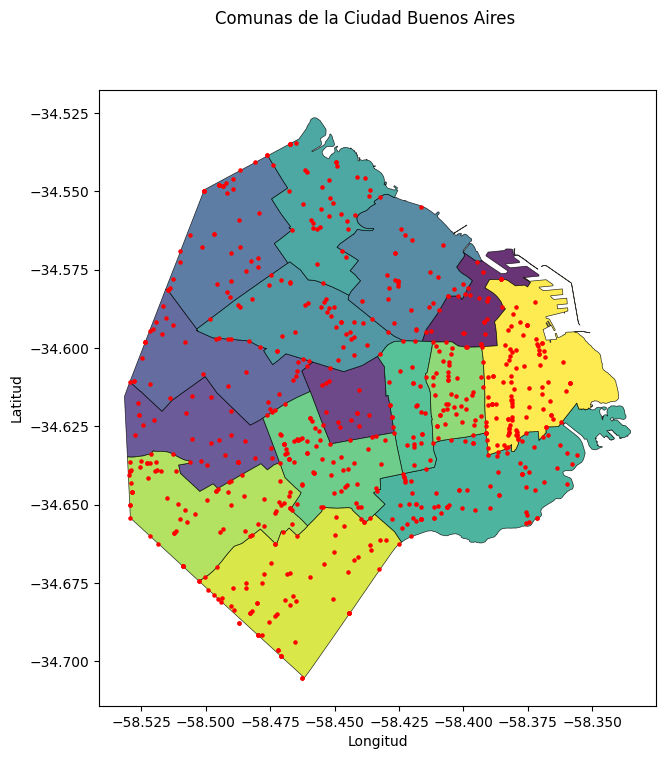

In [25]:
#Se realiza sobre el mapa de CABA la presentación de los puntos de referencia a los siniestros viales

fig, ax = plt.subplots(figsize=(10,8))

#Se dibuja el Shapefile
shapefile.plot(ax=ax, facecolor='Grey', edgecolor='k',alpha=0.8,linewidth=0.5,cmap="viridis")

#Se dibujan los datos geoespaciales
geodata.plot(ax=ax, color='red', markersize=5);

#Se agregan los títulos
fig.suptitle('Comunas de la Ciudad Buenos Aires', fontsize=12)
ax.set_xlabel('Longitud', fontsize=10)
ax.set_ylabel('Latitud', fontsize='medium')

Análisis de víctimas de siniestros viales por Comunas y Barrios

In [26]:
# Creamos un dataset con el número de víctimas por Barrio y Comuna
Total_comuna=eda.groupby(["Comuna", "Barrios"])["Numero_víctimas"].sum().reset_index()
Total_comuna=Total_comuna.sort_values(by="Numero_víctimas", ascending=False)
Total_comuna

,Comuna,Barrios,Numero_víctimas
0,1,CONSTITUCION - MONTSERRAT - PUERTO MADERO - RE...,101
3,4,BARRACAS - BOCA - NUEVA POMPEYA - PARQUE PATRI...,81
8,9,LINIERS - MATADEROS - PARQUE AVELLANEDA,74
7,8,VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI,70
6,7,FLORES - PARQUE CHACABUCO,65
2,3,BALVANERA - SAN CRISTOBAL,48
14,15,AGRONOMIA - CHACARITA - PARQUE CHAS - PATERN...,47
11,12,COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA ...,43
12,13,BELGRANO - COLEGIALES - NUÃ‘EZ,39
13,14,PALERMO,38


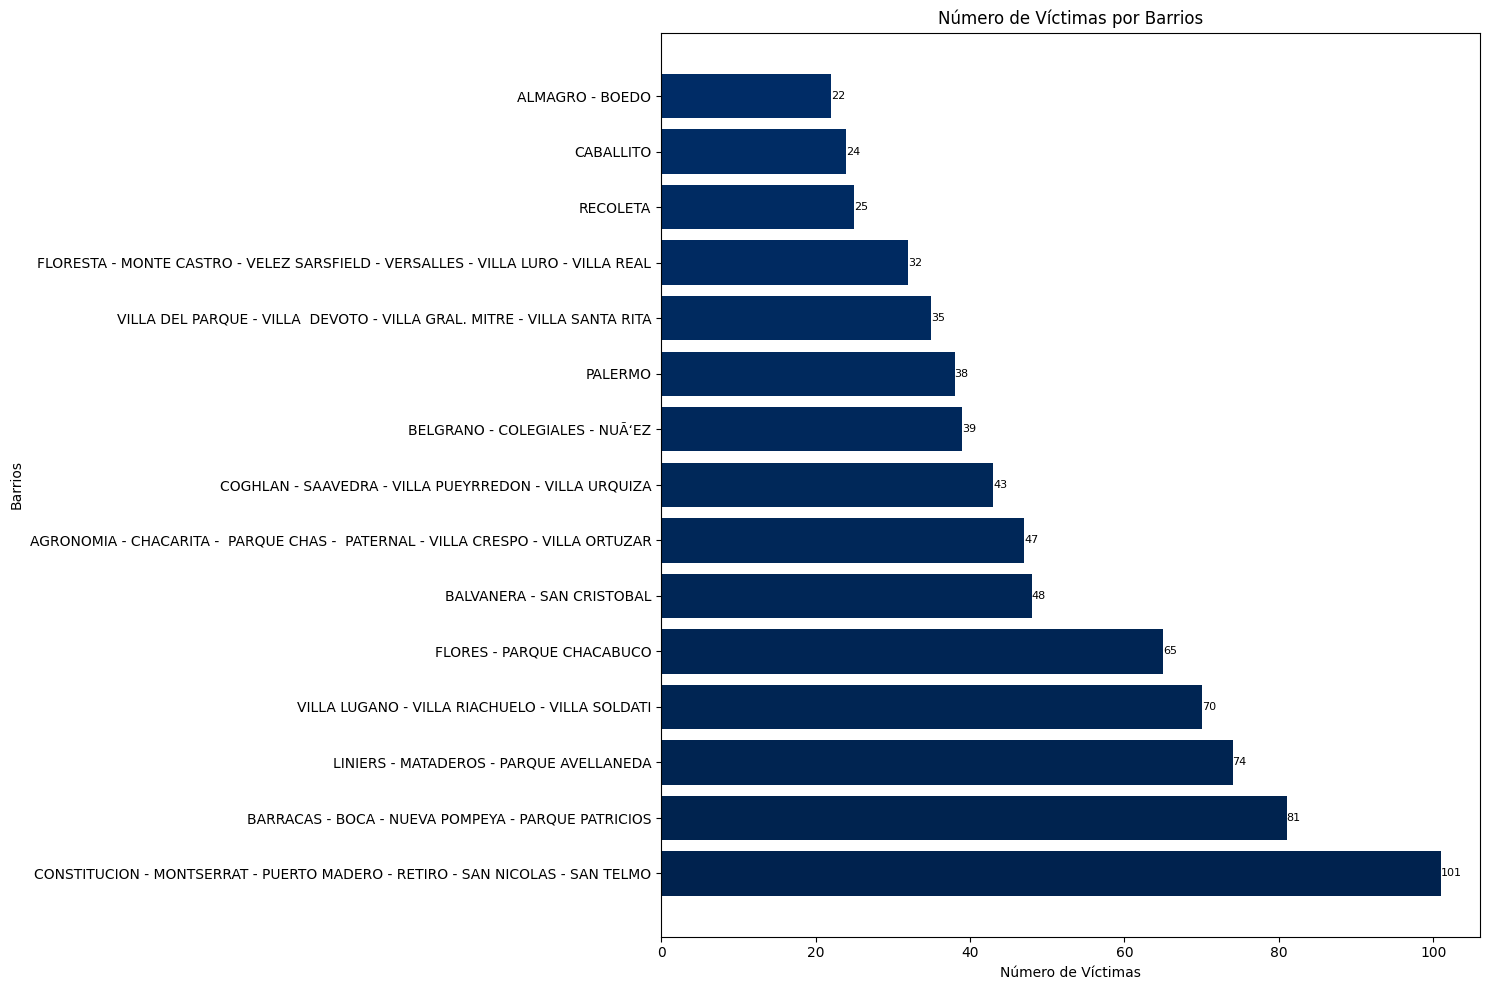

In [32]:
# Se crea un gráfico de barras horizontales
plt.figure(figsize=(15, 10))

# Colores para las barras
colores = plt.cm.cividis(range(len(Total_comuna)))

# Se dibujan las barras horizontales
plt.barh(Total_comuna["Barrios"], Total_comuna["Numero_víctimas"], color=colores)

plt.xlabel('Número de Víctimas')
plt.ylabel('Barrios')

# Título del gráfico
plt.title('Número de Víctimas por Barrios')

# Se agrega el número de víctimas sobre cada barra
for i, v in enumerate(Total_comuna["Numero_víctimas"]):
    plt.text(v, i, str(v), va='center', fontsize=8, color='black')


plt.tight_layout()
plt.show()

En el gráfico se pueden observar un total de 15 comunas, conformadas con uno o varios Barrios. Las comunas con mayor cantidad de víctimas en siniestros viales son las 1, 4, 9, 8 y 7.
En la comuna 1 se encuentra el microcentro de la Ciudad Autónoma de Buenos Aires. Allí mismo se concentra la mayor cantidad de oficinas de trabajo por lo que se supone que la gran cantidad de víctimas faltales por siniestros viales que suceden allí posiblemente sea el tránsito al momento de la entrada ó salida del horario laboral.

Análisis de víctimas por tipos de calle

C:\Users\belen\AppData\Local\Temp\ipykernel_12088\2280058909.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(eda, x='Tipo_de_calle', palette="summer")


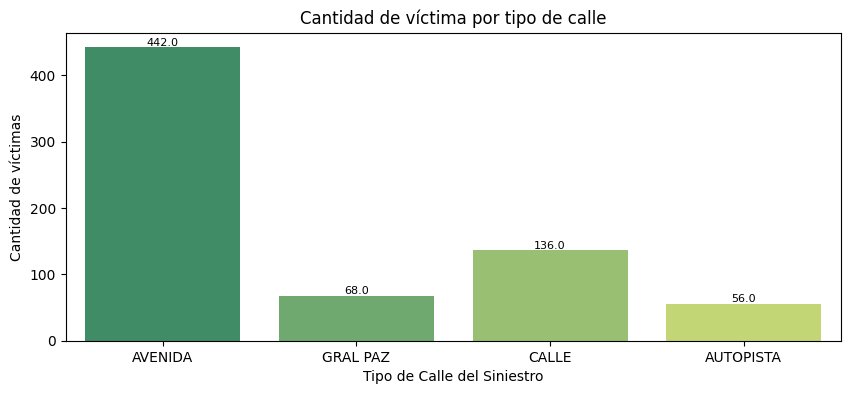

In [33]:
#Se crea el gráfico de barras
plt.figure(figsize=(10, 4))

ax=sns.countplot(eda, x='Tipo_de_calle', palette="summer")

# Se agrega el número de víctimas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)

#Se titulan los ejes
plt.xlabel('Tipo de Calle del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de víctima por tipo de calle')

plt.show()

Se puede observar en el gráfico que la mayor cantidad de víctimas en siniestros viales suceden en las Avenidas, seguido de las calles. 